# Calibration, volatilité locale et stochastique
M2 Probabilités et Finance

Enseignant: Stefano De Marco

## The SVI parameterisation (again)


Recall that the implied total variance $w(T,k)$ for maturity $T$ and log-forward moneyness $k$ is defined by

$$
w(T,k) = T \, \hat \sigma^2(T, k)
$$

where $\hat \sigma(T, k)$ denotes the implied volatility for the same maturity and log-forward moneyness.

__Recall the SVI parameterisation__ proposed by Gatheral 2004 to model the total implied variance smile for a fixed maturity $T$ :

\begin{equation}
w_\mathrm{SVI}(k) = a + b \left(\rho (k - \bar k) + \sqrt{(k - \bar k)^2 + \sigma^2} \right),
\qquad k \in \mathbb R,
\end{equation}

where the parameters $(a, b, \rho, \bar k, \sigma)$ satisfy

$$
b > 0 \qquad \quad \rho \in (-1,1) \qquad \quad \sigma > 0, \qquad \quad a, \bar k \in \mathbb R.
$$

Since $\min_{k \in \mathbb R} w_\mathrm{SVI}(k) = a + b \, \sigma \, \sqrt{1 - \rho^2}$, in general we also have to impose the condition $a + b \, \sigma \, \sqrt{1 - \rho^2} > 0$ in order to grant positivity of the function $w_\mathrm{SVI}$.

### $\blacktriangleright$ The goal of this notebook is to discuss and analyse numerically the no-arbitrage conditions on the SVI parameterization.

First of all, let us define the SVI function (which we have already implemented in the previous notebook).

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def SVI(k, a, b , rho, k_bar, sig):
    total_variance = a + b*( rho*(k - k_bar) + np.sqrt( (k - k_bar)*(k - k_bar) + sig*sig) )
    
    return total_variance

Let us have a look at a few examples of SVI functions

In [2]:
########################
# A parameter set
########################
a = 0.04
b = 0.4
rho = -0.7
k_bar = 0.1
sig = 0.2

In [3]:
################################################
# We define a test for the positivity condition
################################################
def test_positivity(a, b, rho):
    assert(rho <= 1); assert(-1 <= rho)
    assert(b > 0)
    
    ## We check the positivity of the minimum 
    minimum = a + b*sig*np.sqrt(1 - rho*rho)
    assert(minimum > 0)
    
    print("\n Positivity test: OK \n")
    
    return 0

test_positivity(a, b, rho)


 Positivity test: OK 



0

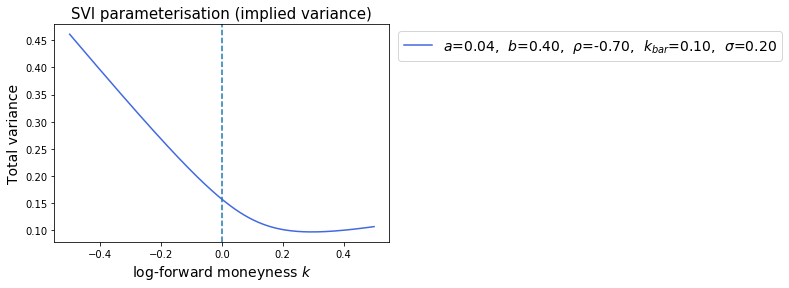

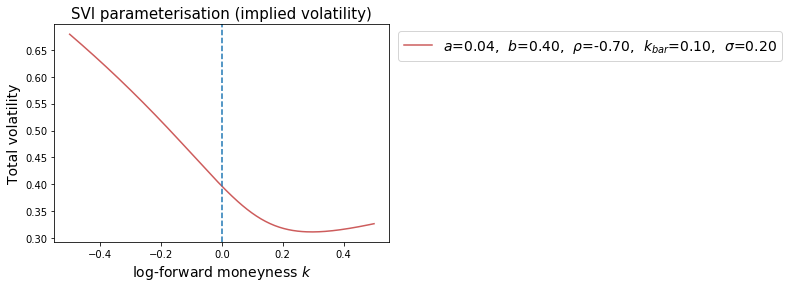

In [4]:
#############################################
## TO DO: initialise and plot a SVI slice
#############################################
log_moneyness = np.linspace(-0.5, 0.5, 200)

total_variances = SVI(log_moneyness, a=a, b=b, rho=rho, k_bar=k_bar, sig=sig)

plt.plot(log_moneyness, total_variances, color='royalblue', linewidth=1.5, \
         label=r"$a$=%1.2f,  $b$=%1.2f,  $\rho$=%1.2f,  $k_{bar}$=%1.2f,  $\sigma$=%1.2f" %(a,b,rho,k_bar,sig))

plt.axvline(0., linestyle="--")

plt.xlabel("log-forward moneyness $k$", fontsize=14)
plt.ylabel("Total variance", fontsize=14)
plt.title(r"SVI parameterisation (implied variance)", fontsize=15)

plt.legend(loc=9, fontsize=14, bbox_to_anchor=(1.6, 1.0), ncol=1)

#######################################################
## TO DO: plot the corresponding SVI total implied vol
#######################################################
total_vols = np.sqrt(total_variances)

plt.figure()

plt.plot(log_moneyness , total_vols , color="indianred", linewidth=1.5, \
         label=r"$a$=%1.2f,  $b$=%1.2f,  $\rho$=%1.2f,  $k_{bar}$=%1.2f,  $\sigma$=%1.2f" %(a,b,rho,k_bar,sig))

plt.axvline(0., linestyle="--")

plt.xlabel("log-forward moneyness $k$", fontsize=14)
plt.ylabel("Total volatility", fontsize=14)
plt.title(r"SVI parameterisation (implied volatility)", fontsize=15)

plt.legend(loc=9, fontsize=14, bbox_to_anchor=(1.6, 1.0), ncol=1)

plt.show()

#### $\blacktriangleright$ The sufficient conditions for the absence of static arbitrage on an SVI slice

The two conditions 

1) $$
g_{\mathrm{SVI}}(k) := 
\frac 12 w''_{\mathrm{SVI}}(k)
+ \left(1-\frac{k \, w'_{\mathrm{SVI}}(k)}{2 \, w_{\mathrm{SVI}}(k)}\right)^2 -\frac {(w'_{\mathrm{SVI}}(k))^2}{4}\left(\frac 1{w_{\mathrm{SVI}}(k)}+\frac{1}{4}\right) \geq 0,
\qquad \forall k \in \mathbb R
$$

3) $$
\lim_{k \to \infty} d_1 \left(k, w_{\mathrm{SVI}}(k) \right) 
= \lim_{k \to \infty} \left( -\frac k{\sqrt{w_{\mathrm{SVI}}(k)}} + \frac 12 {\sqrt{w_{\mathrm{SVI}}(k)}} \right) = -\infty
$$

grant the absence of arbitrage on the SVI parameterisation $w_{\mathrm{SVI}}(\cdot)$ (for the fixed maturity $T$).

Note that, as we have seen in the lectures: 
+ Condition 1 is equivalent to the convexity of the corresponding call price with respect to strike

$$\partial_{KK} Call(T, K) \ge 0 \qquad \mbox{ for every } K \ge 0, $$

where $Call(T, K) = Call_{BS}\Bigl(T, K,  \sigma = \frac 1{\sqrt T}\sqrt{ w_{\mathrm{SVI}}(\log K/F_0^T) } \Bigr)$.

+ Condition 3 is equivalent to $$\lim_{K \to \infty} Call(T, K) = 0.$$

#### $\blacktriangleright$ TO DO Condition 3: show that the condition $\lim_{k \to \infty} d_1(k,w(k)) = -\infty$ is satisfied if

$$
\limsup_{k \to \infty} \frac{w(k)}{2 k} < 1.
$$

#### Compute $\lim_{k \to \infty} \frac{w_{\mathrm{SVI}}(k)}k$ and infer that the SVI parameterisation $w_{\mathrm{SVI}}$ satisfies condition 3 as soon as
$$ b (1 + \rho) < 2. $$

In [5]:
############################################################
# We define a test for the asymptotic slope condition above
############################################################
def test_slope(b, rho):
    right_slope = b * (1 + rho)
            
    print("\n Right slope b*(1 + rho) = %1.4f" %right_slope)
    
    assert(right_slope <=2)
    
    pass

test_slope(b, rho)


 Right slope b*(1 + rho) = 0.12


#### $\blacktriangleright$ Condition 1: we accept to test it numerically (...and therefore only partially!)

We will use the formulas

$$
\begin{aligned}
&w'_\mathrm{SVI}(k) =  b \rho + b \frac{k - \bar k}{\sqrt{(k - \bar k)^2 + \sigma^2}}
\\
&w''_\mathrm{SVI}(k) =  \frac{b \, \sigma^2}{\left((k - \bar k)^2 + \sigma^2\right)^{3/2}}
\end{aligned}
$$

$$
g_{\mathrm{SVI}}(k)= 
\frac 12 w''_{\mathrm{SVI}}(k)
+ \left(1-\frac{k \, w'_{\mathrm{SVI}}(k)}{2 \, w_{\mathrm{SVI}}(k)}\right)^2 -\frac {(w'_{\mathrm{SVI}}(k))^2}{4}\left(\frac 1{w_{\mathrm{SVI}}(k)}+\frac{1}{4}\right) \geq 0,
\qquad \forall k \in \mathbb R
$$

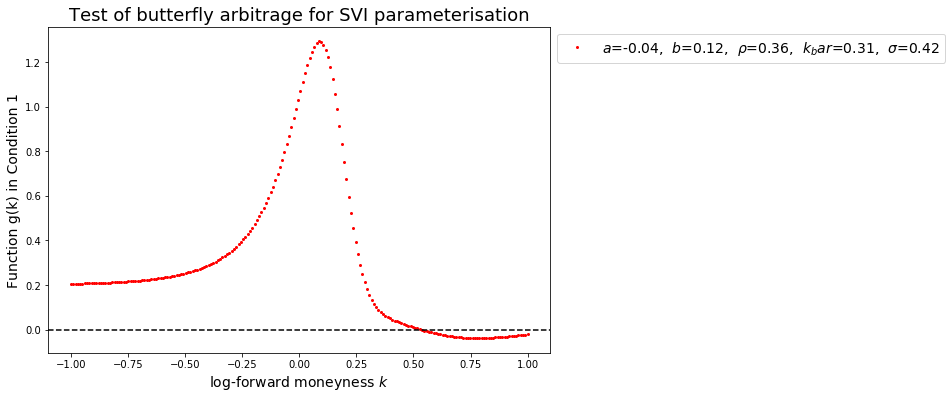

(test_fct_g >= 0).all() False


AssertionError: 

In [9]:
##############################################
# Numerical check of the no-butterfly condition
# on a grid of points
##############################################
def test_convexity(k, a, b, rho, k_bar, sig):
    square_rt = np.sqrt( (k - k_bar)*(k - k_bar) + sig*sig)
    
    w = SVI(k, a, b, rho, k_bar, sig)
    
    first_der_w = b*rho + b*(k - k_bar) / square_rt
    
    second_der_w = b*sig*sig / (square_rt**3)
    
    g = 0.5*second_der_w + (1 - k*first_der_w / (2*w))**2
    g = g - (1/4) * first_der_w**2 * (1/w + 1/4)    
    
    return g

##################################################
## TO DO: complete the following function, which
## evaluates and plot the function g_SVI(k)
## on a fixed log-moneyness grid
##################################################
def numerical_test_convexity(a, b, rho, k_bar, sig, log_mon_lower=-1, log_mon_upper=1):
    log_moneyness_test = np.linspace(log_mon_lower, log_mon_upper, 200)

    test_fct_g = test_convexity(log_moneyness_test, a, b, rho, k_bar, sig)

    plt.figure(figsize=(9,6))

    plt.plot(log_moneyness_test, test_fct_g, color="red", linewidth=0., marker=".", markersize=4, \
             label=r"$a$=%1.2f,  $b$=%1.2f,  $\rho$=%1.2f,  $k_bar$=%1.2f,  $\sigma$=%1.2f" %(a,b,rho,k_bar,sig))

    plt.axhline(0., linestyle="--", color="k")

    plt.xlabel("log-forward moneyness $k$", fontsize=14)
    plt.ylabel("Function g(k) in Condition 1", fontsize=14)
    plt.title(r"Test of butterfly arbitrage for SVI parameterisation", fontsize=18)

    plt.legend(loc=9, fontsize=14, bbox_to_anchor=(1.4, 1.0), ncol=1)

    plt.show()
    
    # We test whether all the entries of the array test_fct_g have positive values
    assert( (test_fct_g >= 0).all() )
    
    pass
    
numerical_test_convexity(a, b, rho, k_bar, sig)

$\blacktriangleright$ Now consider the following parameter set:


 Positivity test: OK 


 Right slope b*(1 + rho) = 0.16


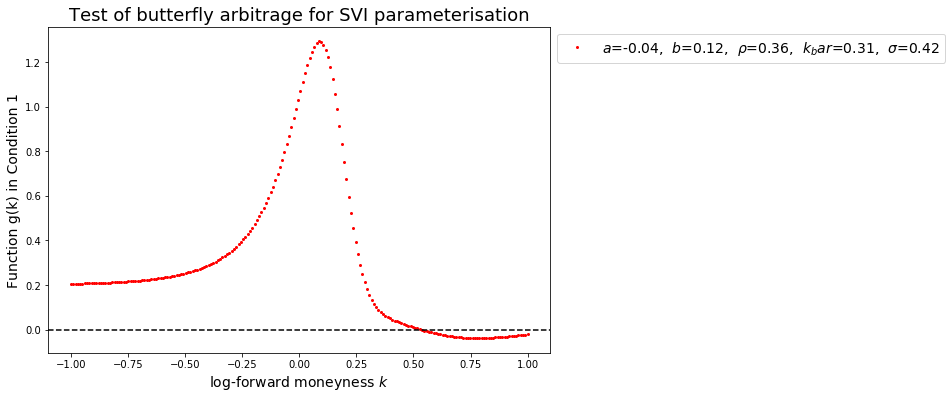

(test_fct_g >= 0).all() False


AssertionError: 

In [10]:
a = -0.041
b = 0.12
rho = 0.3586
k_bar = 0.3060
sig = 0.4153

test_positivity(a, b, rho)
test_slope(b,rho)
numerical_test_convexity(a, b, rho, k_bar, sig, log_mon_lower=-1, log_mon_upper=1)

and re-run the tests above.

### Back to the calibration example on SPX data

Let us reload the dataset (SPX implied volatility smile) we have used in the previous notebook (observation date = Mon Jan 29 2024, and expiration Date = Fri Feb 16 2024, file *SPX_vol_quotes.csv*).

We also import the optimal SVI parameters we have already calibrated therein.

In [11]:
quotes = np.loadtxt(open("SPX_vol_quotes.csv", "r"), delimiter=";")

mkt_log_mon = quotes[0]
vols_calls = quotes[1]
    
# We only have one option maturity, equal to 18 days
maturity = 18/365

########################################################################################
## The SVI parameters already calibrated (previous TP) via least-square minimimization 
## (without any weight on the loss function)
########################################################################################
a_star, b_star, rho_star, k_bar_star, sig_star = 8.387e-34, 0.04249, -0.999, -0.1119, 0.1118

$\blacktriangleright$ Let us plot again the market smile and the SVI smile:

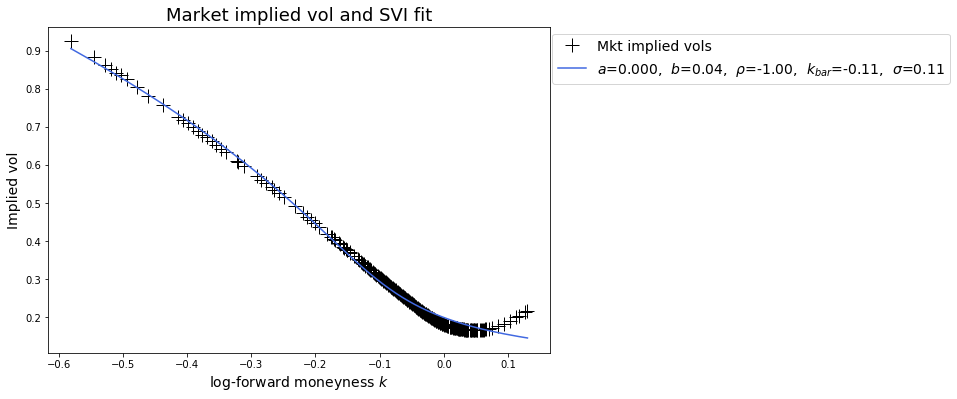

In [15]:
plt.figure(figsize=(9,6))

###########
# Market
###########
plt.plot(mkt_log_mon, vols_calls,
         color='k', linewidth=0., marker="+", markersize=14, label="Mkt implied vols")

##########
# Model
##########
total_variances_fit = SVI(mkt_log_mon, a_star, b_star, rho_star, k_bar_star, sig_star)

implied_vols_fit = np.sqrt(total_variances_fit / maturity)

plt.plot(mkt_log_mon, implied_vols_fit,
         color='royalblue', linewidth=1.5, 
         label=r"$a$=%1.3f,  $b$=%1.2f,  $\rho$=%1.2f,  $k_{bar}$=%1.2f,  $\sigma$=%1.2f" %(a_star, b_star, rho_star, k_bar_star, sig_star))

plt.xlabel(r"log-forward moneyness $k$", fontsize=14)
plt.ylabel("Implied vol", fontsize=14)
plt.title("Market implied vol and SVI fit", fontsize=18)

plt.legend(loc=9, fontsize=14, bbox_to_anchor=(1.4, 1.0), ncol=1)

#### $\blacktriangleright$ TO DO: check a posteriori the no-Butterfly arbitrage conditions on the calibrated SVI


 Positivity test: OK 


 Right slope b*(1 + rho) = 0.00


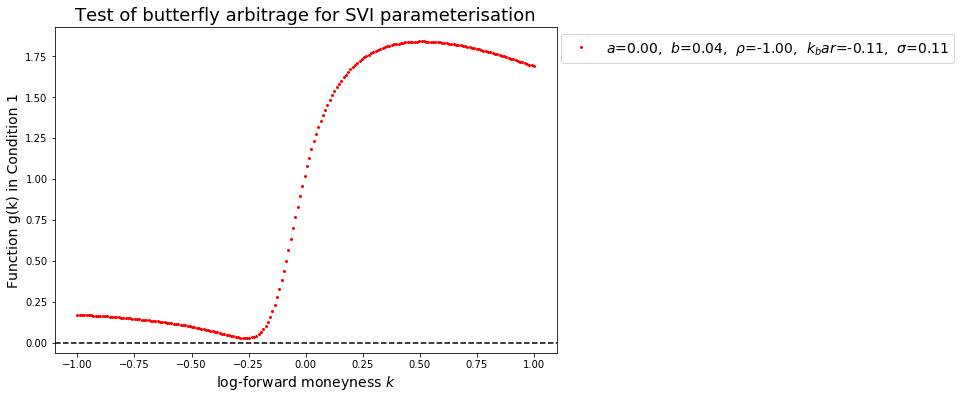

(test_fct_g >= 0).all() True


In [16]:
## TO DO: test positivity
test_positivity(a=a_star, b=b_star, rho=rho_star)

## TO DO: test the no-butterfly arbitrage condition (slope + convexity)
test_slope(b=b_star, rho=rho_star)

numerical_test_convexity(a_star, b_star, rho_star, k_bar_star, sig_star, log_mon_lower=-1, log_mon_upper=1)

#### $\blacktriangleright$ According to our numerical check, the no arbitrage condition is satisfied for the calibrated SVI slice above...

..but, as we have seen in one of the numerical examples above, this might fail to be the case even for parameter sets that produce a reasonable-looking implied volatility smile.

A __possible (even if not perfect) solution__ to avoid such situations is to calibrate a SVI parameterisation while _penalizing_ the parameters that violate the no arbitrage condition:

$$
\min_{(a, \, b, \, \rho, \, \bar k, \, \sigma)}
\biggl(
\sum_{i} \left( w^{\mathrm{mkt}}(k_i) - w_\mathrm{SVI} \left(k_i \, ; a,b,\rho,\bar k,\sigma \right) \right)^2
+ \lambda \sum_{k \in \pi} \Bigl(   g_\mathrm{SVI} \left(k \, ; a,b,\rho,\bar k,\sigma \right)^-  \Bigr)^2
\biggr)
$$

where:

+ $k_i$ are the observed market values of log-moneyness
+ $\pi$ is some pre-defined grid of log-moneyness values (possibly larger that the set $\{k_i\}_i$)
+ $x^-$ denotes the negative part. 

In the problem above, $\lambda > 0$ is an additional penalization parameter to be chosen by the user.
Of course, the choice of $\lambda$ affects the final result. On the one hand, one would like to take $\lambda$ large, so that the violation of the no-arbitrage condition is strongly penalised.
On the other, we would like to take $\lambda$ small, so that the minimization problem above is close to the original one (the least square calibration of an unconstrained SVI). 
In general, the choice of $\lambda$ for a given calibration problem is not obvious.

$\blacktriangleright$  We present below an alternative solution that allows to formulate the no-arbitrage constraints in terms of simple and explicitly checkable conditions in the parameter space: __another parameterisation, called SSVI__.
The price to pay for this advantage is a weaker calibration power (3 available parameters instead of 5).

## Another parametric model that avoids arbitrage and that parametrizes the whole surface: the SSVI ("surface SVI") parametric family

So far, we have worked with one single maturity $T$.

How to extend the parametric model to several maturities, that is to the whole volatility surface ?

A solution is provided by the SSVI parameterisation of [Gatheral and Jacquier, 2014](https://www.tandfonline.com/doi/abs/10.1080/14697688.2013.819986), constructed as follows: first define the

### SSVI slice

$$
w_\mathrm{SSVI}(k) = \frac{\theta} 2 \Bigl(1 + \varphi \, \rho k + \sqrt{(\varphi \, k + \rho)^2 + 1 - \rho^2} \Bigr),
\qquad k \in \mathbb R
$$

where 

$$
\theta \ge 0, \qquad \varphi \ge 0, \qquad \rho \in (-1,1).
$$

Note that $w_\mathrm{SSVI}(k) \big|_{k=0} = \theta$, so that the parameter $\theta$ corresponds to the ATM total variance.

It is possible to see that the SSVI slice $w_\mathrm{SSVI}$ is a special case of the original SVI $w_\mathrm{SVI}$, parameterised by __three parameters instead of five__: the mapping "SSVI to SVI" is given by 

$$
w_\mathrm{SSVI}(k; \theta, \varphi, \rho) = w_\mathrm{SVI}(k; a,b, \rho, \bar k, \sigma)
$$
where
$$
a = \frac \theta 2 (1-\rho^2), \quad
b = \frac{\theta \varphi} 2, \quad
\bar k = -\frac \rho \varphi, \quad
\sigma = \frac{\sqrt{1 - \rho^2}}\varphi.
$$

#### $\blacktriangleright$ The first advantage of the SSVI slice with respect to SVI (at fixed maturity):

+ Thanks to the reduced complexity (3 parameters instead of 5), the no-butterfly arbitrage conditions 1) and 3) on a SSVI slice can be replaced with much simpler conditions on the parameters $(\theta, \varphi, \rho)$, given in [Gatheral and Jacquier 2014], Theorem 4.2, which states that the no-arbitrage conditions 1) and 3) are satisfied if

$$
\left\{
\begin{aligned}
&\theta \, \varphi \, (1+|\rho|) < 4
\\
&\theta \, \varphi^2 \, (1+|\rho|) \le 4.
\end{aligned}
\right.
$$

#### $\blacktriangleright$ The disadvantages

+ Of course, 3 parameters have a reduced calibration power with respect to 5.


+ The two inequalities above are *sufficient* conditions for absence of butterfly arbitrage, but they are not necessary conditions (in other words: they parameterize a sub-set of the whole admissible set of no-arbitrage values of  $(\theta, \varphi, \rho)$).

$\blacktriangleright$ Try a calibration of the SSVI slice (as opposed to SVI) to the market data above.

### Full SSVI surface

At this stage, we have only worked with fixed-maturity slices of the implied volatility surface. We haven't defined a function $w_\mathrm{SSVI}$ of $(T, k)$ yet.

Given:

+ a curve $T \mapsto \theta_T \ge 0$ (representing at-the-money total implied variance for maturity $T$)


+ a function $\varphi: \mathbb R_+ \to \mathbb R_+$,

the __surface SVI__ model is defined by

$$
\begin{aligned}
w_\mathrm{SSVI}(T, k) 
&= 
w_\mathrm{SSVI}(k; \ \theta_{T}, \ \varphi(\theta_T), \ \rho) 
\\
&= \frac{\theta_{T}} 2 \Bigl(1 + \varphi(\theta_{T}) \rho k + \sqrt{\bigl(\varphi(\theta_{T}\bigr) k + \rho)^2 + 1 - \rho^2} \Bigr),
\qquad k \in \mathbb R, T > 0.
\end{aligned}
$$

#### $\blacktriangleright$ The second result on SSVI:

The __no-calendar spread arbitrage condition__ from the lectures:

2) The function $T \mapsto w_\mathrm{SSVI}(T, k) $ is increasing, for every $k \in \mathbb R$,

can also be reformulated as a simple condition on the functions $\theta_\cdot$ and $\varphi(\cdot)$, see [Gatheral and Jacquier 2014], Theorem 4.1:

$$
\left\{
\begin{aligned}
&T \mapsto \theta_T \mbox{ is increasing }
\\
&0 
\le
\partial_\theta (\theta \, \varphi(\theta))
\le
\frac1{\rho^2} \left(1+ \sqrt{1-\rho^2}\right) \varphi(\theta) \qquad \forall \theta,
\end{aligned}
\right.
$$

where, in the second line, we have supposed that the functions $\theta_\cdot$ and $\varphi(\cdot)$ are differentiable.

[Gatheral and Jacquier 2014] provide parametric examples of functions $T \mapsto \theta_T$ and $\theta \mapsto \varphi(\theta)$ that satisfy the no-calendar spread arbitrage condition above.